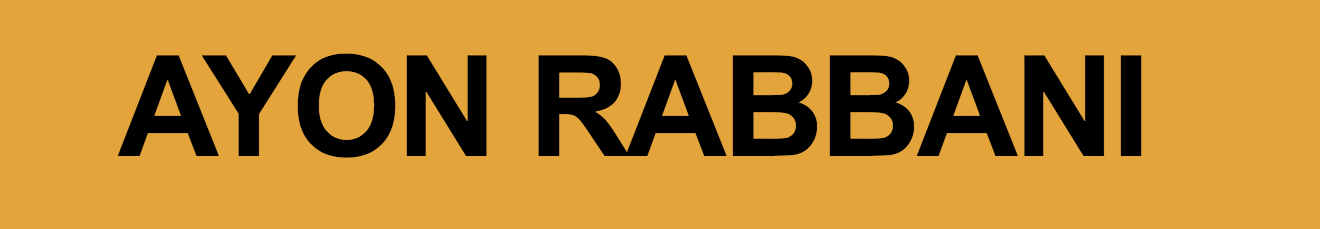

**github**: www.github.com/ayonrabbani 

**linkedin**: www.linkedin.com/in/ayonrabbani2 

**email**: ayonrabbani@gmail.com 

***RESOURCES FOR FURTHER LEARNING: ***  

[Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/), available for free as pdf. This textbook covers all the essential machine learning algorithms in-depth. Math included :)  

[
Introduction to Machine Learning for Coders](https://course18.fast.ai/ml.html), a free online 12-week course that covers Random Forest and Nerual Networks in-depth. Created by Jeremy Howard (founder of FastAI and lecturer at USF Data Institute). *I based this algortihm on his work, so all the credit is his*. I've added added some modifications since his code seems broken. 

[StatQuest's Video on Decision Trees!](https://www.youtube.com/watch?v=7VeUPuFGJHk&t=2s), the greatest video ever if you want a fun and easy way to understand introduction to decision trees. **DEFINITELY WATCH THIS, IT'LL MAKE EVERYTHING CLEAR :)**



In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing

# The Data
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

The Decision Tree we're making has only one functionality, to predict the "avaialabity_365" or number of days available in a year. Looking at the data, it seems some columns will not not help in predicting the dependent variable. 

In [0]:

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
#Removing all the columns not needed
cleaned_df = df.drop(['latitude','longitude','name','host_id','host_name','id','last_review','calculated_host_listings_count'], axis=1)
cleaned_df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0


# Writing the Decision Tree Class
We're going to use Object Oriented Programing write the Decision Tree. Using a top-down appraoch, making it intuitive. I recommend, you follow along and mess around with the code to develop an understanding of whats happening. 

In [0]:
class DecisionTree(): 
    """Decision Tree Class with 3 arguments. 
       X variable, Y variable, and which rows we'll
       of the data we'll work with. Remember, the inputs
       are a pandas dataframe."""
    def __init__(self, x, y, idxs=None): 
        """Intially, we'll pass in the whole data-set; 
           therefore, idxs will equal the whole lenght
           of the data-set"""
        if idxs is None: idxs = np.arange(len(y))
        """Otherwise, everything equals the inputs"""
        self.x, self.y, self.idxs = x, y, idxs
        """self.columns = # of variables"""
        self.columns = x.shape[1]
        """score is used to measure how well the decision
           tree is seperating its branches"""
        self.score = float('inf')
        """self.create_branch is used to create our branches
           and eventually the final leaf nodes"""
        self.create_branch()
        
        def create_branch(self):
            """the decision tree will create branch or split the data into
               a left node and right node by using the function find_best_split.
               From here on out, I'll order the steps. This will help in understanding
               how recursion is used in the DecisionTree() class. 
               
               STEP 1 --> FIND BEST SPLIT
               """
            for variable in range(self.columns): self.find_best_split(variable)
                
                """
                    (SCROLL DOWN FOR STEP 2)
                    STEP 7: STOPPING THE RECURSIVE TREE
                    
                    Eventually, self.score will not be < infinity. This happens if we run out of data. 
                    Which means, we've split the data-set so many times, it cannot be split anymore. 
                    
                    Finally the Algortim can stop.
                
                """
                
            if self.score == float('inf'): return
                
                """
                    STEP 4 --> CREATING ROOT NODE
                    
                    From step 3, after finding the lowest score and finding which self.variable
                    to split at, create the root node. 
                    
                    Initially, the root node is always the whole data-set, thus self.idxs = np.arange(len(y)).
                    Eventually, after the first split, self.idxs = the specific rows that belong to a  
                    specific left_node or right_node. 
                """
            root_node = self.x.values[self.idxs, self.variable]
                
                
                """
                    STEP 5 --> SPLIT THE DATA
                    Now the decision tree will actually split the data, in find_best_split() the 
                    tree was trying to find where to split. 
                    
                    Remember self.split = x_var[row]
                    
                    Remeber left_node & right_node = list of True or False

                """
            left_node = np.nonzero(root_node <= self.split)[0]
            right_node = np.nonzero(root_node > self.split)[0]
                
                """
                    STEP 6 --> CREATE LEFT AND RIGHT NODES
                    
                    Time for RECURSION. 
                    After seperating into left_node & right_node, create_branch() has made 2 NEW DATA-SETS
                    
                    We went from 1 whole data-set --> split into 2 data-sets.
                    
                    self.left_node = DecisionTree() --> creates an additional 2 data-sets from each split dataset. 
                    self.right_node does the same thing. This goes on until DecisionTree reaches some stopping 
                    criteria. 
                    
                    look at self.idxs[left_node] <-- This is what creates the new data-set. left_node looks something
                    like this [TRUE, FALSE, TRUE, TRUE...]. The indexes that get passed on into the new data-set is where
                    left_node = TRUE. Else, it's passed on the right node. 

                """
            self.left_node = DecisionTree(self.x, self.y, self.idxs[left_node])
            self.right_node = DecisionTree(self.x, self.y, self.idxs[right_node])
                
        def find_best_split(self, variable):
            """
               STEP 2 --> Redefine X and Y variables.
               
               The size of X and Y will shrink
               with each recursive step. After each split, left and righ nodes are created.
               The algorithm is independtly applied to each node: 
               
                               Root Node: Has 100 variables
                                    Split at row 50
                                  /                  \
                                 /                    \
                                /                      \
               Left Node: Has 50 variables.      Right Node: Has 50 variables. 
                Now we apply DecisionTree()       Now we apply DecisionTree()
                to this node. Which will          to this node. Which will
                make another Left and Right       make another Left and Right
                node under this node. The         node under this node. The
                Algorithm stops after it          Algorithm stops after it
                reaches some stopping             reaches some stopping
                criteria.                         criteria.
               
            """
            x_var = self.x.values[self.idxs, variable]
            y_var = self.y.values[self.idxs]
            
            for row in range(len(x_var)):
                """Run this for loop with some simple data to understand
                   what its doing. It returns True or False. 
                   
                   If x_var = [6,7,8,9,10,11] and row = 4
                   then x_var[row] = 10. 
                   
                   Therefore, left_node = [True, True, True, True, True, False]
                             right_node = [False, False, False, False, False, True]
                   
                   """
                left_node = x_var <= x_var[row]
                right_node = x_var > x_var[row]
                
                """
                    Why compute the std()? Its used to compute our score. For each node,
                    we want the lowest standard deviation. This means that the branches
                    grouped together will be the most simillar. 
                """
                left_value = y_var[left_node].std()
                right_value = y_var[right_node].std()
                
                """
                    Eventually, we might reach a x_var[row] which equals the largest
                    in the row (from our example --> 11). If right_node = x_var > LARGEST VALUE, 
                    right_node will be a list of "False". Thus we won't be able to calculate a 
                    std for righ_value because it'll be an empty list. 
                    
                    This is just because how I decided to compute my score, and is not related
                    to the decision tree. You can figure out better ways for computing a score. 
                    
                """
                if math.isnan(right_value.sum()):
                    continue
                """
                    STEP 3 --> CALCULATE A SCORE 
                    
                    The function create_branch() loops through all the columns in the data-set
                    and sends each one to find_best_split(). 
                    
                    find_best_split() then runs through all the rows in that column to find the best
                    split point. The point where both the left node and right node have lowest score. 
                    
                    The score becomes current_score. I defined self.score = infinity. Therefore, the first
                    current_score will update self.score. 
                    
                    Next, column #2 gets passed into find_best_split(). If this current_score is lower than 
                    our previous score, self.score gets updated again. 
                    
                    Loop through all the columns till the lowest score is found. This becomes the 
                    root node of the decision tree. 
                    
                    Define two new variables self.split & self.variable.
                    self.split = x_var[row] or the value of where that column was split. 
                    self.variable = variable or the column index of the split. 
                """
                current_score = left_value * left_value.sum() + right_value.sum()
                if current_socre < self.score: 
                    self.score, self.split, self.variable = current_score, x_var[row], variable
      
      """
        Below are some code that'll print out the output for the decision tree. 
      """
      @property
      def split_name(self): return self.x.columns[self.variable]
        
      def __repr__(self):
            s = f'n: {len(self.idxs)};'
            if not self.score == float('inf'):
                s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
            return s
                    

**Putting it all together**

In [0]:
import math

class DecisionTree(): 
    
    def __init__(self, x, y, idxs=None): 
        if idxs is None: idxs = np.arange(len(y))
        self.x, self.y, self.idxs = x, y, idxs
        self.columns = x.shape[1]
        self.score = float('inf')
        self.create_branch()
        
    def create_branch(self):
        for variable in range(self.columns): self.find_best_split(variable)
        
        if self.score == float('inf'): return 
            
        root_node = self.x.values[self.idxs, self.variable]
        left_node = np.nonzero(root_node <= self.split)[0]
        right_node = np.nonzero(root_node > self.split)[0]
            
        self.left_node = DecisionTree(self.x, self.y, self.idxs[left_node])
        self.right_node = DecisionTree(self.x, self.y, self.idxs[right_node])
                
    def find_best_split(self, variable):

        x_var = self.x.values[self.idxs, variable]
        y_var = self.y.values[self.idxs]
            
        for row in range(len(x_var)):
               
            left_node = x_var <= x_var[row]
            right_node = x_var > x_var[row]

            left_value = y_var[left_node].std()
            right_value = y_var[right_node].std()
                
            if math.isnan(right_value.sum()):
                continue
              
            current_score = left_value * left_value.sum() + right_value.sum()
            if current_score < self.score: 
                 self.score, self.split, self.variable = current_score, x_var[row], variable
        
    @property
    def split_name(self): return self.x.columns[self.variable]
        
    def __repr__(self):
            s = f'n: {len(self.idxs)};'
            if not self.score == float('inf'):
                s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
            return s

In [0]:
#Getting Dummy Variables and dropping Nan
cleaned_df = pd.get_dummies(cleaned_df)
cleaned_df = cleaned_df.dropna()
cleaned_df.head()

In [0]:
cols = [col for col in cleaned_df.columns if col != 'availability_365']
x = cleaned_df[cols][:25]
y = cleaned_df['availability_365'][:25]

In [0]:
#Use the Function!
test = DecisionTree(x, y)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


**run test, test.right_node, and test._left_node to see the root node and the first two branches.**

n: number of rows or data in node

score: score of node

split: what value the node split on

var: the variable the node split on

It's recomended to use a small dataset for this algorithm, becuase it is not opitmized in the slightest. It will run really slow; however, if you've ever wondered how the algorithm works or how a random forest uses decision trees, this is it. 

In [0]:
test

n: 25;; score:142.9783929888639; split:0.1; var:reviews_per_month

In [0]:
test.right_node

n: 21;; score:140.27939977060066; split:9; var:number_of_reviews

In [0]:
test.left_node

n: 2;; score:0.0; split:Brooklyn; var:neighbourhood_group

**That's how a decision tree works! Soon, we'll add a predict function so we can answer our question, and do some other explorations with Random Forests.**